In [207]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import os
from collections import Counter

Questions answered using matploblib as the visualization tool:
- What is the overall result distribution within "Computer vs Computers" and "Computer vs Human" games?
- What is progression overtime of winning of Humans against Computer?

In [224]:
#Assigning Variables
chess_cvc = pd.read_csv(filepath_or_buffer="./Chess/2016_CvC.csv")
chess_cvh = pd.read_csv(filepath_or_buffer="./Chess/2016_CvH.csv")
barh_colors = ['white', 'black', 'gray']
barh_bgc = '#93bf85'


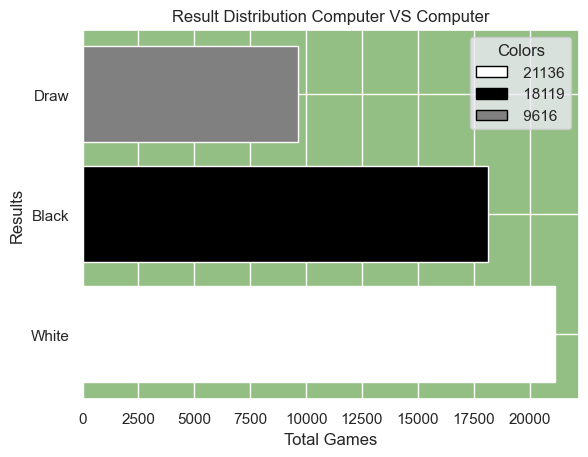

In [225]:
winners_cvc = chess_cvc['Result-Winner'].value_counts()
patches = []

plt.barh(winners_cvc.index, winners_cvc.values, color=barh_colors)
plt.xlabel('Total Games')
plt.ylabel('Results')
plt.title('Result Distribution Computer VS Computer')

# Add a legend for each bar
for i, label in enumerate(winners_cvc.index):
    patch = Patch(facecolor=barh_colors[i], edgecolor='black')
    patches.append(patch)
    plt.plot([], [], c='black', label=label)
    
# Add the legend with color boxes and values
legend = plt.legend(handles=patches,title='Colors')
for i, text in enumerate(legend.get_texts()):
    text.set_text(text.get_text() + ' {:d}'.format(winners_cvc.values[i]))

# Customize the plot
#plt.grid(True, linestyle='-', linewidth=.5, color='white')
plt.gca().set_axisbelow(True)
plt.gca().set_facecolor(barh_bgc)
plt.gca().set_zorder(10)

plt.show()

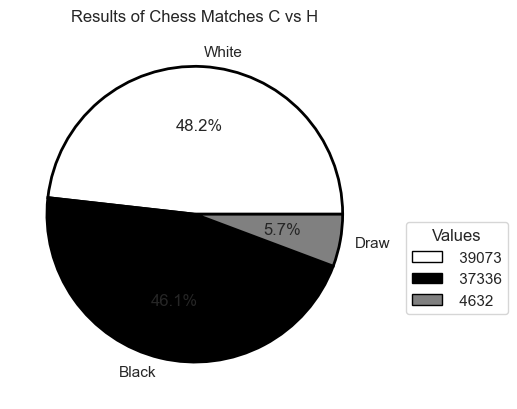

In [191]:
winners_cvh = chess_cvh['Result-Winner'].value_counts()
patches = []

# Add a title
plt.title("Results of Chess Matches C vs H")

# Add a legend for each bar
for i, label in enumerate(winners_cvh.index):
    patch = Patch(facecolor=barh_colors[i], edgecolor='black')
    patches.append(patch)
    plt.plot([], [], c='black', label=label)
    
# Add the legend with color boxes and values
legend = plt.legend(handles=patches,title='Values', bbox_to_anchor=(1.05, 0.5))
for i, text in enumerate(legend.get_texts()):
    text.set_text(text.get_text() + ' {:d}'.format(winners_cvh.values[i]))

#plt.show()
# Create a pie chart
plt.pie(winners_cvh, labels=winners_cvh.index, autopct='%1.1f%%', colors=barh_colors, wedgeprops={'linewidth': 2, 'edgecolor': 'black'})



# Show the chart
plt.show()


C:\Users\danih\AppData\Local\Temp\ipykernel_9584\3220114887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_hwins['Date'] = pd.to_datetime(white_hwins['Date'])


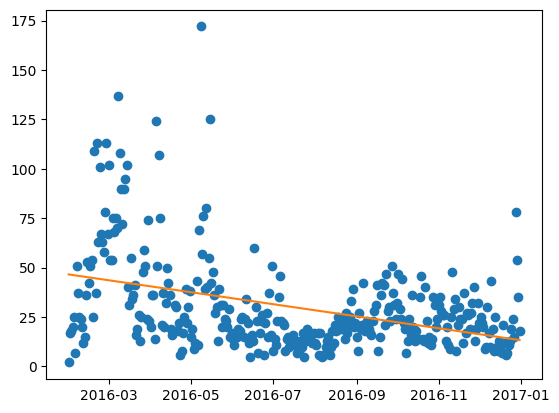

In [148]:
white_hwins = chess_cvh.loc[(chess_cvh['Result-Winner'] == 'White') & (chess_cvh['WhiteIsComp'] == 'No')]

white_hwins['Date'] = pd.to_datetime(white_hwins['Date'])
freq = white_hwins.groupby('Date')['Result-Winner'].count()

# Calculate the coefficients of a polynomial that fits the data
coefficients = np.polyfit(freq.index.astype(np.int64) // 10**9, freq.values, deg=1)

# Create a function that represents the polynomial
poly1d_fn = np.poly1d(coefficients)

plt.plot(freq.index, freq.values, 'o')
plt.plot(freq.index, poly1d_fn(freq.index.astype(np.int64) // 10**9), '-')

C:\Users\danih\AppData\Local\Temp\ipykernel_9584\3057272398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_hwins['Date'] = pd.to_datetime(black_hwins['Date'])


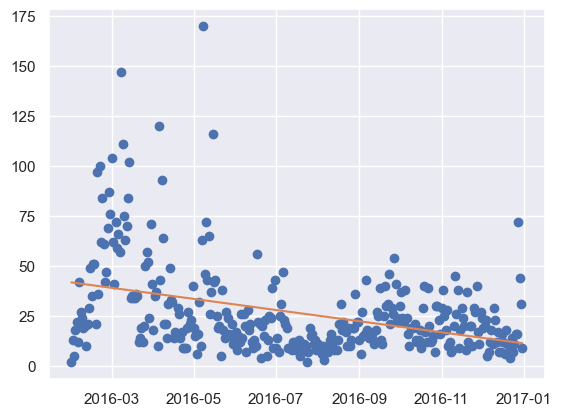

In [226]:
black_hwins = chess_cvh.loc[(chess_cvh['Result-Winner'] == 'Black') & (chess_cvh['BlackIsComp'] == 'No')]

black_hwins['Date'] = pd.to_datetime(black_hwins['Date'])
freq = black_hwins.groupby('Date')['Result-Winner'].count()

# Calculate the coefficients of a polynomial that fits the data
coefficients = np.polyfit(freq.index.astype(np.int64) // 10**9, freq.values, deg=1)

# Create a function that represents the polynomial
poly1d_fn = np.poly1d(coefficients)

plt.plot(freq.index, freq.values, 'o')
plt.plot(freq.index, poly1d_fn(freq.index.astype(np.int64) // 10**9), '-')

Questions answered using Seaborn as the visualization tool:
- Assuming an openning is defined by the first 7 movements, what are the top 10 most winning opening using White and Black pieces Computer VS Human and Computer VS Computer?

C:\Users\danih\AppData\Local\Temp\ipykernel_9584\1097017116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_wins['Moves'] = white_wins['Moves'].str.split()
C:\Users\danih\AppData\Local\Temp\ipykernel_9584\1097017116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_wins['Moves'] = [[s for s in subarray if '.' not in s] for subarray in white_wins['Moves']]
C:\Users\danih\AppData\Local\Temp\ipykernel_9584\1097017116.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

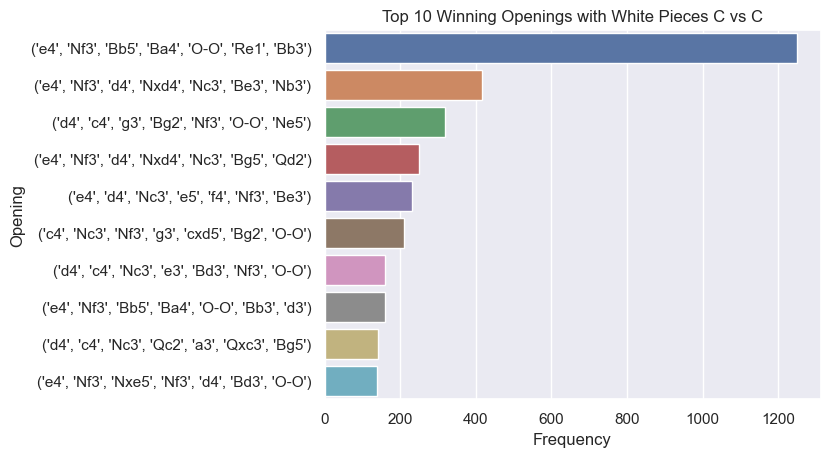

In [174]:
# Assigning Variables 
white_wins = chess_cvc.loc[chess_cvc['Result-Winner'] == 'White']
white_wins['Moves'] = white_wins['Moves'].str.split()

# remove elements containing a dot in each array
white_wins['Moves'] = [[s for s in subarray if '.' not in s] for subarray in white_wins['Moves']]

# remove black movements
white_wins['Moves'] = [[subarray[i] for i in range(len(subarray)) if i % 2 == 0] for subarray in white_wins['Moves']]

# Getting just the first 7 moves
white_wins['Moves'] = [subarray[:7] for subarray in white_wins['Moves']]

# calculate frequency of each array
frequency = Counter(tuple(subarray) for subarray in white_wins['Moves'])

# get top 10 most common arrays
top_ten = frequency.most_common(10)

# create a DataFrame from the list of tuples
top_winning_openings = pd.DataFrame(top_ten, columns=['Opening', 'Frequency'])

# sort the DataFrame by frequency in descending order
top_winning_openings = top_winning_openings.sort_values('Frequency', ascending=False)

# create a horizontal bar chart with Seaborn
sns.set(style="darkgrid")
sns.barplot(x='Frequency', y='Opening', data=top_winning_openings)
plt.title("Top 10 Winning Openings with White Pieces C vs C")
plt.xlabel("Frequency")
plt.ylabel("Opening")
plt.show()

C:\Users\danih\AppData\Local\Temp\ipykernel_9584\493677000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_wins['Moves'] = black_wins['Moves'].str.split()
C:\Users\danih\AppData\Local\Temp\ipykernel_9584\493677000.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_wins['Moves'] = [[s for s in subarray if '.' not in s] for subarray in black_wins['Moves']]
C:\Users\danih\AppData\Local\Temp\ipykernel_9584\493677000.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

<Axes: xlabel='Frequency', ylabel='Sequence'>

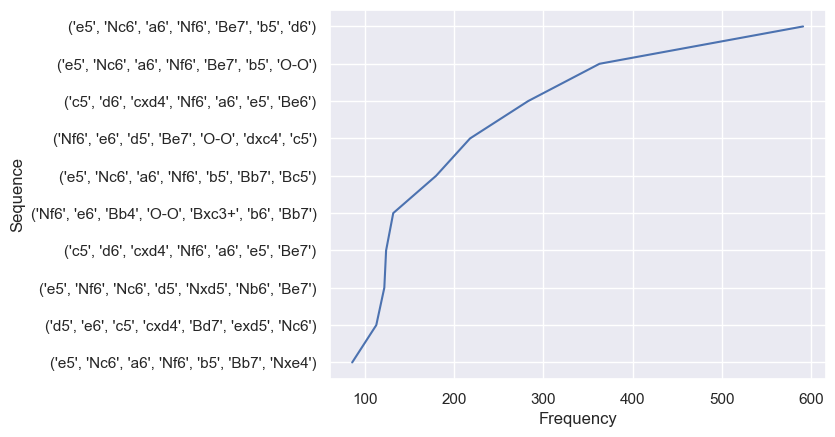

In [218]:
# Assigning Variables 
black_wins = chess_cvc.loc[chess_cvc['Result-Winner'] == 'Black']
black_wins['Moves'] = black_wins['Moves'].str.split()

# remove elements containing a dot in each array
black_wins['Moves'] = [[s for s in subarray if '.' not in s] for subarray in black_wins['Moves']]

# remove white moves
black_wins['Moves'] = [[subarray[i] for i in range(len(subarray)) if i % 2 != 0] for subarray in black_wins['Moves']]

# Getting just the first 7 moves
black_wins['Moves'] = [subarray[:7] for subarray in black_wins['Moves']]

# calculate frequency of each array
frequency = Counter(tuple(subarray) for subarray in black_wins['Moves'])

# get top 10 most common arrays
top_ten = frequency.most_common(10)

# Convert to DataFrame
df = pd.DataFrame(top_ten, columns=['Sequence', 'Frequency'])

df['Sequence'] = df['Sequence'].astype(str)


# Create line plot
sns.set_style("darkgrid")
sns.lineplot(data=df, x="Frequency", y="Sequence", sort=False)
